<a href="https://colab.research.google.com/github/OhSujin/AIB/blob/main/AI_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : 게임의 이름입니다.
Platform : 게임이 지원되는 플랫폼의 이름입니다.
Year : 게임이 출시된 연도입니다.
Genre : 게임의 장르입니다.
Publisher : 게임을 제작한 회사입니다.
NA_Sales : 북미지역에서의 출고량입니다.
EU_Sales : 유럽지역에서의 출고량입니다.
JP_Sales : 일본지역에서의 출고량입니다.
Other_Sales : 기타지역에서의 출고량입니다


지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [24]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('vgames2.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [52]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [53]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [54]:
df.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [56]:
# 년도 데이터 정리 
df.iloc[:,2] 
np.sort(df['Year'])

array([   0.,    0.,    0., ..., 2017., 2017., 2020.])

In [57]:
print (len(df[df['Year'].apply(lambda x : len(str(int(x))) == 1)])) # 1자리 표현방식 개수
print (len(df[df['Year'].apply(lambda x : len(str(int(x))) == 2)])) # 2자리 표현방식 개수
def year_form(x):
    if len(str(int(x))) == 1:
        x = x+2000
    elif len(str(int(x))) == 2:
        if int(x) <= 22:
            x = x+2000
        else:
            x = x+1900
    return x

df['Year']= df['Year'].apply(year_form)

53
47


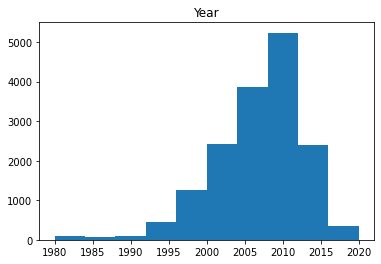

In [58]:
# Year 별 히스토그램
plt.hist(df['Year'])
plt.title('Year')
plt.show()

In [59]:
def convert_str_to_number(x):
    if 'K' in x:
        x = x[:len(x)-1]
        x = float(x)*1000
    elif 'M' in x:
        x = x[:len(x)-1]
        x = float(x)*1000000
    else:
        x = float(x)*1000000
    return x

In [60]:
df['NA_Sales'] = df['NA_Sales'].apply(convert_str_to_number)
df['EU_Sales'] = df['EU_Sales'].apply(convert_str_to_number)
df['JP_Sales'] = df['JP_Sales'].apply(convert_str_to_number)
df['Other_Sales'] = df['Other_Sales'].apply(convert_str_to_number)

In [61]:
# total sales 변수 만들기
df['Total_sales'] = df['NA_Sales']+ df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


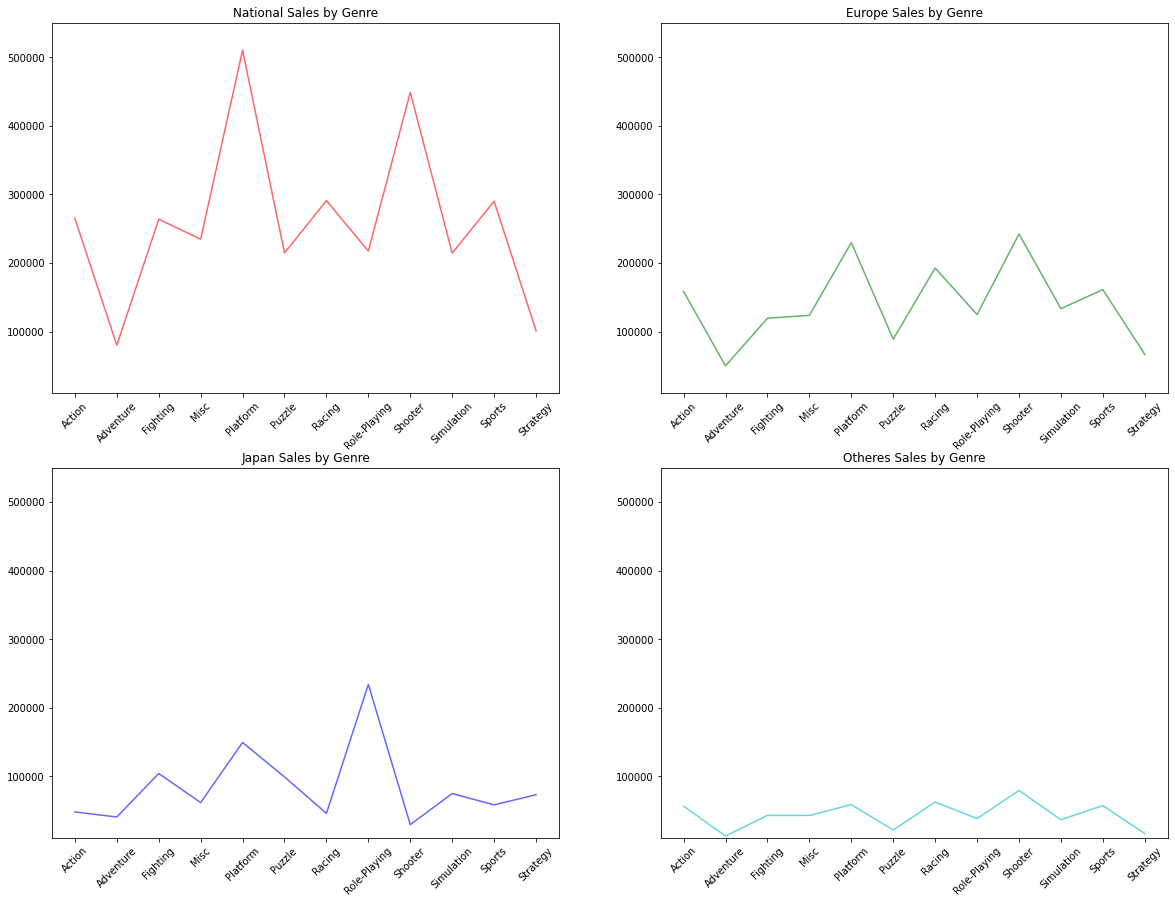

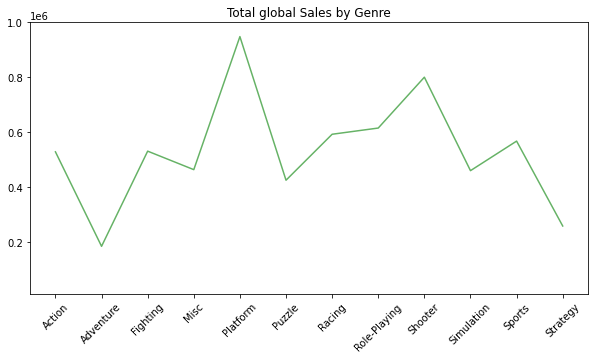

In [65]:
# 지역에 따라서 선호하는 게임 장르가 다를까? --> 장르그룹별 나라평균
g_TT_s = df.groupby('Genre')['Total_sales'].mean()
g_NA_s = df.groupby('Genre')['NA_Sales'].mean()
g_EU_s = df.groupby('Genre')['EU_Sales'].mean()
g_JP_s = df.groupby('Genre')['JP_Sales'].mean()
g_OT_s = df.groupby('Genre')['Other_Sales'].mean()

plt.figure(figsize=(20,15)) 

plt.subplot(221)
plt.plot(g_NA_s,  c='r', alpha = 0.6)
plt.xticks(rotation=45)
plt.ylim(10000, 550000)
plt.title('National Sales by Genre')
plt.subplot(222)
plt.plot(g_EU_s,  c='g', alpha = 0.6)
plt.xticks(rotation=45)
plt.ylim(10000, 550000)
plt.title('Europe Sales by Genre')
plt.subplot(223)
plt.plot(g_JP_s,  c='b', alpha = 0.6)
plt.xticks(rotation=45)
plt.ylim(10000, 550000)
plt.title('Japan Sales by Genre')
plt.subplot(224)
plt.plot(g_OT_s,  c='c', alpha = 0.6)
plt.xticks(rotation=45)
plt.ylim(10000, 550000)
plt.title('Otheres Sales by Genre')
plt.show()

plt.figure(figsize=(10,5)) 
plt.plot(g_TT_s,  c='g', alpha = 0.6)
plt.xticks(rotation=45)
plt.ylim(10000, 1000000)
plt.title('Total global Sales by Genre')
plt.show()